# Importation des librairies utilisées.

In [142]:
import os
import sys

import sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

import scipy.stats as stats

%matplotlib inline
os.environ['KMP_DUPLICATE_LIB_OK']='True'
# Pour la reproductibilité des résultats
np.random.seed(43)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('Do not show this message')

sns.set(rc={'figure.figsize':(6, 4)})
sns.set_theme(context="notebook", style="white", palette="pastel",font_scale=0.9)

# AED

## Questions

### Questions préliminaires de l’AED

1. Quelles sont les descripteurs (colonnes) du data set ?

2. Combien d'enregistrements (lignes) ont été fournis ?

3. Quel est le format des données. Par exemple, dans quel format les dates sont fournies, existe-t-il des valeurs numériques, à quoi ressemblent les différentes valeurs catégorielles ?

4. Y a-t-il des valeurs manquantes ? Y a-t-il des variables avec un nombre élevé de valeurs manquantes ?

5. Est-ce que les classes sont-elles équilibrées ?

6. Est-ce qu'il y a des variables aberrantes ?

7. Laquelle des variables pourrait être utile à mon objectif ? 

8. Que représente une seule ligne de l'ensemble de données ? 

### Exploration plus approfondie des données

1. Numérique variable : Statistique descriptive 

* Quels sont les statistiques descriptives de base d’une variable numérique : count, mean, std, min, 25%, median, 75%, max

* Quelle est la plage d’une variable numérique ? 

* Les variables sont-elles fortement corrélées les unes aux autres ?

* Les variables sont-elles fortement corrélées avec le Target ?

2. Variable catégorielle

* Quelle est la valeur la plus fréquente pour une variable catégorielle ?

* Quelle est la moyenne d’une variable numérique regroupée par une variable catégorielle ?

* Combien de points de données y a-t-il, regroupés par 2 variables catégorielles ?

3. Visualisation des données

* Quelle est la distribution d’une variable numérique ? Y a-t-il des erreurs à gérer ?

* barchart (variable catégorielle univariante)

* heatmap (deux variable catégorielle)

* scatterplot (variable numérique bivarie)

* violon (for outliers : variable target)


# Informations sur la base de données.

#### Buts de l'analyse
Notre analyse vise à montrer un exemple complet de projet comprenant les volets suivants:
<ul>
<li>le prétraitement des données,</li>
<li>l'entrainement d'un modèle de regression avec celles-ci,</li>
<li>l'identification des variables mesurées les plus importantes, c.-à-d. celles qui ont le plus grand effet pour prédire le salaire horaire moyen.</li>
</ul>

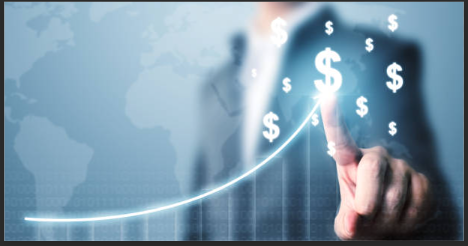

### Analyse des forme

Variable target : Salaire horaire moyen, Difference salaire homme/femme

* **Ligne et colonne: (168300, 15)**

niveau de detail, une ligne par :
                  Géographie, 
                  Classification nationale des professions(CNP4),
                  Sexe,
                  Groupe d’âge,
                  Période de référence

* **Type de variables: 10 variables de type numérique et 5 variables qualitative.**

    * Géographie : Canada, Province ou territoire
    * Ratio du salaire hebdomadaire moyen entre les femmes et les hommes	
    * Ratio du salaire hebdomadaire médian entre les femmes et les hommes
    * Ratio du salaire horaire moyen entre les femmes et les hommes	
    * Ratio du salaire horaire médian entre les femmes et les hommes	
    * Salaire hebdomadaire moyen	
    * Salaire hebdomadaire médian	
    * Salaire horaire moyen	
    * Salaire horaire médian	
    * Total des employés, tous les salaires
    * Classification nationale des professions(CNP4)
    * Sexe
    * Groupe d’âge
    * Genre de travail	
    * Période de référence : annuelle (1997-2021)

La repartition des individus est egale pour toutes les modalites des variables Sexe, CNP, Groupe d'age

* **Type des valeurs manquantes**  

    * 25% des valeurs a 0 pour les variables 
        * Salaire hebdomadaire moyen	
        * Salaire hebdomadaire médian	
        * Salaire horaire moyen	
        * Salaire horaire médian
    
Il y a 48277(25%) des enregsitrements dont la valeur du salaire hebdomadaire moyen est egal a 0.

Repartition: 

CNP: 
* 2049 (1.37%), Superviseurs/superviseures et métiers techniques dans les ressources naturelles, l'agriculture et la production connexe, 
* 2106 (1.25%), Personnel des services de protection public de première ligne
* 2049	(1.22%) Cadres supérieurs/cadres supérieures [00]		

Regions:

* 4.60% (7743) dans Île-du-Prince-Édouard et Terre-Neuve-et-Labrador	
* 4.42% (5986)	Nouveau-Brunswick et Nouvelle-Écosse
* 1.56% (2628) Québec	   
    
* **Valeurs extremes **

On va supposer, pour l'exemple, que la base de données contient 0,5% de valeurs aberrantes de toutes sortes. Ce n'est pas exagéré. Cela représente $0,005*168300 \approx 841$ valeurs.

On utilise la méthode de la [forêt d'isolation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html) pour détecter et éliminer un maximum de 0,5% des valeurs possiblement aberrantes.  
    
### Analyse de structure

* Calculer difference de Salaire horaire moyen entre  Salaire horaire moyen (homme)-  Salaire horaire moyen(femme)
* Conserver seulement les variables :  
    * Régions : Province ou territoire,
    * Salaire horaire moyen	
    * Classification nationale des professions(CNP4)
    * Sexe
    * Groupe d’âge
    * Genre de travail	
    * Période de référence : annuelle


### Nettoyage des donnees: Recommandations


* Filtrer la modalite "Les deux sexes" de la variable **Sexe**
* Filtrer la modalite "15 ans et plus" de la variable **Groupe d'âge**
* Filtrer la modalite "'Canada'" de la variable **Region**
* Prendre les occurences plus grande que 0



In [31]:
# valider la version de python

print (f"Python version: {sys.version}\n")
print (f"Matplotlib version: {matplotlib.__version__}")
print (f"Numpy version: {np.__version__}")
print (f"Seaborn version: {sns.__version__}")

Python version: 3.8.11 (default, Aug  6 2021, 09:57:55) [MSC v.1916 64 bit (AMD64)]

Matplotlib version: 3.5.2
Numpy version: 1.21.5
Seaborn version: 0.11.2


Note : cet notebbok est réalisée avec les versions suivants:

Python version: 3.8.11 (default, Aug  6 2021, 09:57:55) [MSC v.1916 64 bit (AMD64)]

Matplotlib version: 3.5.2

Numpy version: 1.21.5

Seaborn version: 0.11.2

# Partie I: Prétraitement des données.

## Lecture des bases de données en format CSV.

In [2]:
def load_db():
    salaire_employe_CNP = pd.read_csv("salaire_employe_CNP",sep=",")
   # duree_emploi_CNP=pd.read_csv("duree_emploi_CNP",sep=",")
   # postes_vacants_CNP=pd.read_csv("postes_vacants_CNP",sep=",")
  #  caractéristiques_population_active=pd.read_csv("caractéristiques_population_active",sep=",")
   # heures_habituellement_travaille=pd.read_csv("heures_habituellement_travaille",sep=",")
   # heures_effectivement_travaille=pd.read_csv("heures_effectivement_travaille",sep=",")
   # personnes_avec_plus_un_emploi=pd.read_csv("personnes_avec_plus_un_emploi",sep=",")
   # raison_quitter_emploi=pd.read_csv("raison_quitter_emploi",sep=",")
   # absence_travail_temps_plein=pd.read_csv("absence_travail_temps_plein",sep=",")
    return salaire_employe_CNP#,duree_emploi_CNP,postes_vacants_CNP,caractéristiques_population_active,heures_habituellement_travaille,heures_effectivement_travaille,personnes_avec_plus_un_emploi,raison_quitter_emploi,absence_travail_temps_plein

In [3]:
salaire_employe_CNP=load_db()
#,duree_emploi_CNP,postes_vacants_CNP,caractéristiques_population_active,heures_habituellement_travaille,heures_effectivement_travaille,personnes_avec_plus_un_emploi,raison_quitter_emploi,absence_travail_temps_plein=load_db()

## Explorer les données

In [35]:
salaire_employe_CNP.head(5)

,Année,Régions,CNP,Sexe,Groupe d'âge,Genre de travail,Ratio_salaire_hebdo_moyen,Ratio_salaire_hebdo_median,Ratio_salaire_horaire_moyen,Ratio_salaire_horaire_median,Salaire hebdomadaire moyen,Salaire hebdomadaire médian,Salaire horaire moyen,Salaire horaire médian,"Total des employés, tous les salaires"
0,1997,Alberta,"Affaires, finance et administration [1]",Femmes,15 ans et plus,Employés à temps partiel,1.17,1.28,1.21,1.28,201.43,170.0,11.64,10.27,28.4
1,1997,Alberta,"Affaires, finance et administration [1]",Femmes,15 ans et plus,Employés à temps plein,0.67,0.70,0.71,0.74,511.11,480.8,13.39,12.69,125.9
2,1997,Alberta,"Affaires, finance et administration [1]",Femmes,15 ans et plus,Ensemble des employés à temps plein et à temps...,0.63,0.67,0.72,0.74,454.10,452.0,13.06,12.35,154.3
3,1997,Alberta,"Affaires, finance et administration [1]",Femmes,15 à 24 ans,Employés à temps partiel,0.96,1.15,0.94,0.91,118.06,110.0,7.57,7.00,5.2
4,1997,Alberta,"Affaires, finance et administration [1]",Femmes,15 à 24 ans,Employés à temps plein,0.84,0.84,0.85,0.85,366.70,346.0,9.47,9.00,13.2


In [5]:
salaire_employe_CNP.tail(5)

,Année,Régions,CNP,Sexe,Groupe d'âge,Genre de travail,Ratio du salaire hebdomadaire moyen entre les femmes et les hommes,Ratio du salaire hebdomadaire médian entre les femmes et les hommes,Ratio du salaire horaire moyen entre les femmes et les hommes,Ratio du salaire horaire médian entre les femmes et les hommes,Salaire hebdomadaire moyen,Salaire hebdomadaire médian,Salaire horaire moyen,Salaire horaire médian,"Total des employés, tous les salaires"
504895,2021,Île-du-Prince-Édouard,Vente et services [6],Les deux sexes,25 à 54 ans,Employés à temps plein,0.0,0.0,0.0,0.0,729.04,690.0,18.64,18.00,5.8
504896,2021,Île-du-Prince-Édouard,Vente et services [6],Les deux sexes,25 à 54 ans,Ensemble des employés à temps plein et à temps...,0.0,0.0,0.0,0.0,649.06,630.0,18.06,16.80,7.1
504897,2021,Île-du-Prince-Édouard,Vente et services [6],Les deux sexes,55 ans et plus,Employés à temps partiel,0.0,0.0,0.0,0.0,263.54,260.0,15.65,14.50,0.9
504898,2021,Île-du-Prince-Édouard,Vente et services [6],Les deux sexes,55 ans et plus,Employés à temps plein,0.0,0.0,0.0,0.0,743.88,701.1,18.98,18.75,2.4
504899,2021,Île-du-Prince-Édouard,Vente et services [6],Les deux sexes,55 ans et plus,Ensemble des employés à temps plein et à temps...,0.0,0.0,0.0,0.0,617.17,600.0,18.10,16.75,3.3


### Dimensions du dataset

In [6]:
print("Les dimensions du jeux des donnees: ", salaire_employe_CNP.shape)
print() 

Les dimensions du jeux des donnees:  (504900, 15)



In [7]:
# Size of our data set
## le nombre de lignes multiplié par le nombre de colonnes si DataFrame.
print("Nombre d’éléments:", salaire_employe_CNP.size)
print()

Nombre d’éléments: 7573500



Le nombre d'individus est égale à 504900 et le nombre de descripteurs est égale à 15

### Type des donnees

In [8]:
salaire_employe_CNP.dtypes

Année                                                                     int64
Régions                                                                  object
CNP                                                                      object
Sexe                                                                     object
Groupe d'âge                                                             object
Genre de travail                                                         object
Ratio du salaire hebdomadaire moyen entre les femmes et les hommes      float64
Ratio du salaire hebdomadaire médian entre les femmes et les hommes     float64
Ratio du salaire horaire moyen entre les femmes et les hommes           float64
Ratio du salaire horaire médian entre les femmes et les hommes          float64
Salaire hebdomadaire moyen                                              float64
Salaire hebdomadaire médian                                             float64
Salaire horaire moyen                   

In [9]:
salaire_employe_CNP.dtypes.value_counts()

float64    9
object     5
int64      1
dtype: int64

 Le jeu des données a 10 variables de type numérique et 5 variables qualitative.

In [10]:
salaire_employe_CNP.describe()

,Année,Ratio du salaire hebdomadaire moyen entre les femmes et les hommes,Ratio du salaire hebdomadaire médian entre les femmes et les hommes,Ratio du salaire horaire moyen entre les femmes et les hommes,Ratio du salaire horaire médian entre les femmes et les hommes,Salaire hebdomadaire moyen,Salaire hebdomadaire médian,Salaire horaire moyen,Salaire horaire médian,"Total des employés, tous les salaires"
count,504900.00000,504900.000000,504900.000000,504900.000000,504900.000000,504900.000000,504900.000000,504900.000000,504900.000000,504900.000000
mean,2009.00000,0.135675,0.137961,0.141779,0.142867,406.801209,383.776997,11.643724,10.945554,33.092849
std,7.21111,0.317148,0.326489,0.328042,0.332440,456.505948,437.583857,11.986711,11.489401,239.623022
min,1997.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2009.00000,0.000000,0.000000,0.000000,0.000000,277.750000,250.000000,11.490000,10.250000,1.300000
75%,2015.00000,0.000000,0.000000,0.000000,0.000000,717.610000,676.000000,19.870000,18.600000,10.300000
max,2021.00000,2.520000,5.860000,2.250000,2.860000,3374.070000,3461.600000,83.140000,86.540000,16197.600000


In [11]:
salaire_employe_CNP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504900 entries, 0 to 504899
Data columns (total 15 columns):
 #   Column                                                                Non-Null Count   Dtype  
---  ------                                                                --------------   -----  
 0   Année                                                                 504900 non-null  int64  
 1   Régions                                                               504900 non-null  object 
 2   CNP                                                                   504900 non-null  object 
 3   Sexe                                                                  504900 non-null  object 
 4   Groupe d'âge                                                          504900 non-null  object 
 5   Genre de travail                                                      504900 non-null  object 
 6   Ratio du salaire hebdomadaire moyen entre les femmes et les hommes    504900 non-nul

* 25% de la population ont les informations sur les salaires avec la valeur 0
* 50% de la population ont le salaire moyenne hebdomadaire moins de 1234.3 et le salaire médian moins de 1153.6
* 50% de la population ont le salaire horaire moyenne au moins de 35.5, et le salaire horaire médiane moins de 33 dollars

In [12]:
salaire_employe_CNP.describe(include=[object])

,Régions,CNP,Sexe,Groupe d'âge,Genre de travail
count,504900,504900,504900,504900,504900
unique,11,51,3,4,3
top,Alberta,"Affaires, finance et administration [1]",Femmes,15 ans et plus,Employés à temps partiel
freq,45900,9900,168300,126225,168300


* La variable Regions contient 11 modalites
* La variable CNP contient 51 modalites
* La variable Sexe contienttient 3 variables
* La variable Groupe d'age contient 4 variables
* La variable genre de travail contient 3 variables

In [25]:
#lister les  occurences de chacune des occurences non-numériques
for key in salaire_employe_CNP.select_dtypes(exclude='number').columns:
    print("\n---- %s ----" % key)
    print(salaire_employe_CNP[key].value_counts())


---- Régions ----
Alberta                    45900
Canada                     45900
Colombie-Britannique       45900
Manitoba                   45900
Nouveau-Brunswick          45900
Nouvelle-Écosse            45900
Ontario                    45900
Québec                     45900
Saskatchewan               45900
Terre-Neuve-et-Labrador    45900
Île-du-Prince-Édouard      45900
Name: Régions, dtype: int64

---- CNP ----
Affaires, finance et administration [1]                                                                                                                           9900
Personnel professionnel en services d'enseignement [40]                                                                                                           9900
Personnel des services de protection public de première ligne [43]                                                                                                9900
Personnel en finance, assurance et personnel assimilé en administration de

In [14]:
salaire_employe_CNP.Régions.unique()

array(['Alberta', 'Canada', 'Colombie-Britannique', 'Manitoba',
       'Nouveau-Brunswick', 'Nouvelle-Écosse', 'Ontario', 'Québec',
       'Saskatchewan', 'Terre-Neuve-et-Labrador', 'Île-du-Prince-Édouard'],
      dtype=object)

In [13]:
salaire_employe_CNP.Sexe.unique()

array(['Femmes', 'Hommes', 'Les deux sexes'], dtype=object)

In [14]:
salaire_employe_CNP["Groupe d'âge"].unique()

array(['15 ans et plus', '15 à 24 ans', '25 à 54 ans', '55 ans et plus'],
      dtype=object)

In [15]:
salaire_employe_CNP["Genre de travail"].unique()

array(['Employés à temps partiel', 'Employés à temps plein',
       'Ensemble des employés à temps plein et à temps partiel'],
      dtype=object)

### Renommage

In [16]:
#operation de trim
cols = salaire_employe_CNP.select_dtypes(object).columns
salaire_employe_CNP[cols] = salaire_employe_CNP[cols].apply(lambda x: x.str.strip())

In [17]:
salaire_employe_CNP.rename(columns = {'Ratio du salaire hebdomadaire moyen entre les femmes et les hommes ':"Ratio_salaire_hebdo_moyen"},inplace=True)
salaire_employe_CNP.rename(columns = {'Ratio du salaire hebdomadaire médian entre les femmes et les hommes ':"Ratio_salaire_hebdo_median"},inplace=True)
salaire_employe_CNP.rename(columns = {'Ratio du salaire horaire moyen entre les femmes et les hommes':"Ratio_salaire_horaire_moyen"},inplace=True)
salaire_employe_CNP.rename(columns = {"Ratio du salaire horaire médian entre les femmes et les hommes ":"Ratio_salaire_horaire_median"},inplace=True)

In [18]:
salaire_employe_CNP.columns

Index(['Année', 'Régions', 'CNP', 'Sexe', 'Groupe d'âge', 'Genre de travail',
       'Ratio_salaire_hebdo_moyen', 'Ratio_salaire_hebdo_median',
       'Ratio_salaire_horaire_moyen', 'Ratio_salaire_horaire_median',
       'Salaire hebdomadaire moyen', 'Salaire hebdomadaire médian',
       'Salaire horaire moyen', 'Salaire horaire médian',
       'Total des employés, tous les salaires'],
      dtype='object')

## Filtres

pour notre analuse on considère les filtres suivantes:

* Filtrer la modalite "Les deux sexes" de la variable **Sexe**
* Filtrer la modalite "15 ans et plus" de la variable **Groupe d'âge**
* Filtrer la modalite "'Canada'" de la variable **Region**
* Filtrer les valeurs a 0 pour la variable target 'Salaire horaire moyen'

In [144]:
salaire_employe_=salaire_employe_CNP.copy()

In [143]:
def filtre_df_salaire():
    filtre_sexe=salaire_employe_CNP.Sexe.isin(["Femmes","Hommes"])
    filtre_plus_15=salaire_employe_CNP["Groupe d\'âge"]!="15 ans et plus"
    filtre_region=salaire_employe_CNP["Régions"]!="Canada"
    filtres_sal_0=salaire_employe_CNP["Salaire horaire moyen"]!=0.0
    
    df1=salaire_employe_CNP[filtre_sexe]
    df2=df1[filtre_plus_15]
    df3=df2[filtre_region]
    df=df3[filtres_sal_0]
    
    return df

In [145]:
salaire_employe_CNP=filtre_df_salaire()

C:\Users\daian\AppData\Local\Temp\ipykernel_12876\2142735483.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2=df1[filtre_plus_15]
C:\Users\daian\AppData\Local\Temp\ipykernel_12876\2142735483.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3=df2[filtre_region]
C:\Users\daian\AppData\Local\Temp\ipykernel_12876\2142735483.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df3[filtres_sal_0]


## Visualisation des données

In [146]:
salaire_employe_CNP.columns

Index(['Année', 'Régions', 'CNP', 'Sexe', 'Groupe d'âge', 'Genre de travail',
       'Ratio_salaire_hebdo_moyen', 'Ratio_salaire_hebdo_median',
       'Ratio_salaire_horaire_moyen', 'Ratio_salaire_horaire_median',
       'Salaire hebdomadaire moyen', 'Salaire hebdomadaire médian',
       'Salaire horaire moyen', 'Salaire horaire médian',
       'Total des employés, tous les salaires'],
      dtype='object')

### Annee

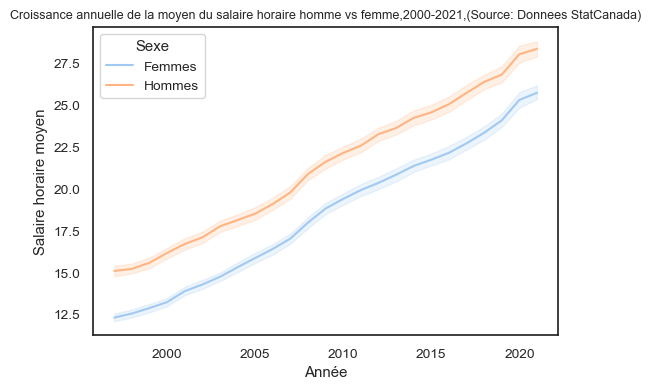

In [201]:
filtre_sexe=salaire_employe_CNP['Sexe'].isin(['Femmes','Hommes'])
sns.lineplot(data=salaire_employe_CNP[filtre_sexe], 
             x="Année", 
             y='Salaire horaire moyen',
             hue='Sexe',
            markers=True,
            dashes=False)
plt.title(label='Croissance annuelle de la moyen du salaire horaire homme vs femme,2000-2021,(Source: Donnees StatCanada)',
          fontdict={'fontsize':9}, loc='center')
plt.show()

Entre 2000 et 2020, l'écart de rémunération horaire moyen est démeuré 
stable entre les salaires de femmes et les salaires des hommes.

In [166]:
salaire_employe_CNP["Groupe d\'âge"].unique()

array(['15 à 24 ans', '25 à 54 ans', '55 ans et plus'], dtype=object)

In [175]:
moyensf=pd.Series(salaire_employe_CNP[salaire_employe_CNP['Sexe']=='Femmes'].groupby('Année')['Salaire horaire moyen'].mean()).sort_values(ascending=True)
moyensh=pd.Series(salaire_employe_CNP[salaire_employe_CNP['Sexe']=='Hommes'].groupby('Année')['Salaire horaire moyen'].mean()).sort_values(ascending=True)
diff=moyensh-moyensf
diff

Année
1997    2.779499
1998    2.661088
1999    2.700055
2000    2.929767
2001    2.809941
2002    2.807367
2003    3.006838
2004    2.812693
2005    2.642212
2006    2.679891
2007    2.754997
2008    2.896222
2009    2.781771
2010    2.738740
2011    2.648348
2012    2.901928
2013    2.779590
2014    2.864531
2015    2.819710
2016    2.898075
2017    3.005977
2018    3.029989
2019    2.726194
2020    2.725839
2021    2.614231
Name: Salaire horaire moyen, dtype: float64

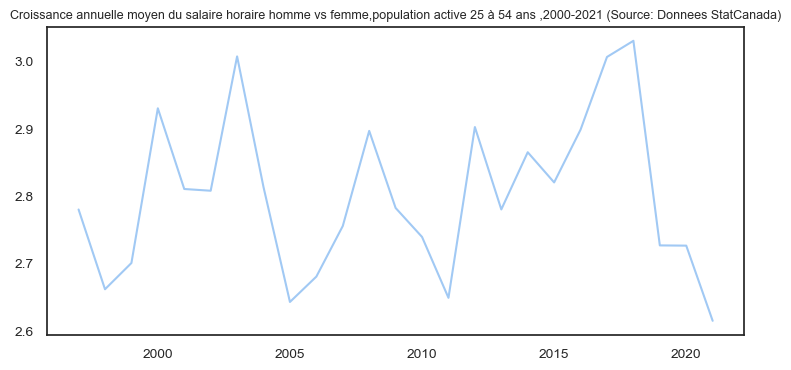

In [248]:
plt.figure(figsize=(9,4))
plt.plot(diff)
plt.title(label='Croissance annuelle moyen du salaire horaire homme vs femme,population active 25 à 54 ans ,2000-2021 (Source: Donnees StatCanada)',
          fontdict={'fontsize':9}, loc='center')
plt.show()

<ul>
En analysant uniquement le salaire horaire moyenne pour la population active de 25 à 54 ans, on constate
un écart de 3.02$ en 2018 qui diminué avec 0.41\$, pour arriver à 2.6\$ en 2020.
</ul>

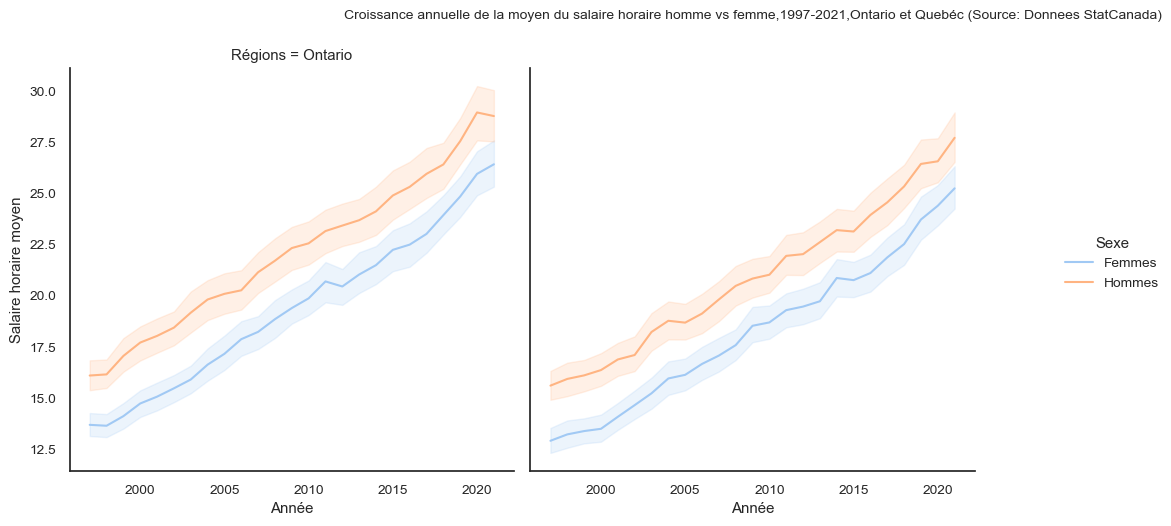

In [199]:
# relational plot
filtre_sexe_Ont_Qc=(salaire_employe_CNP['Sexe'].isin(['Femmes','Hommes'])) & (salaire_employe_CNP['Régions'].isin(['Ontario','Québec']))
sns.relplot(data=salaire_employe_CNP[filtre_sexe_Ont_Qc],
             x="Année", 
             y='Salaire horaire moyen',
             hue='Sexe',
             col='Régions',
             kind='line',
             #markers=True, 
            dashes=True
            
            )
plt.title(label='Croissance annuelle de la moyen du salaire horaire homme vs femme,1997-2021,Ontario et Quebéc (Source: Donnees StatCanada)',
          fontdict={'fontsize':10}, loc='center',y=1.1)
plt.show()

L'ecart salarial homme femme reste constante aux fil des annee.

In [204]:
print()
print("Salaire horaire moyen selon région, données(2000-2020) source Stat Canada")
effectifs=pd.Series(salaire_employe_CNP['Régions'].value_counts()).sort_values(ascending=True)
moyens=pd.Series(salaire_employe_CNP.groupby('Régions')['Salaire horaire moyen'].mean()).sort_values(ascending=True)
moyensf=pd.Series(salaire_employe_CNP[salaire_employe_CNP['Sexe']=='Femmes'].groupby('Régions')['Salaire horaire moyen'].mean()).sort_values(ascending=True)
moyensh=pd.Series(salaire_employe_CNP[salaire_employe_CNP['Sexe']=='Hommes'].groupby('Régions')['Salaire horaire moyen'].mean()).sort_values(ascending=True)
moyens=pd.Series(salaire_employe_CNP.groupby('Régions')['Salaire horaire moyen'].mean()).sort_values(ascending=True)
frequence=round((effectifs/salaire_employe_CNP.shape[0])*100,2)
sommaire_Ind=pd.concat([effectifs,frequence], axis=1,keys=['Eff.',"Freq"])
sommaire_Ind['EffectCumulle']=sommaire_Ind['Eff.'].cumsum()
sommaire_Ind['FreqCumulle']= sommaire_Ind['Freq'].cumsum()
sommaire_Ind["Salaire horaire moyen"]=moyens
sommaire_Ind["Salaire horaire moyen femmes"]=moyensf
sommaire_Ind["Salaire horaire moyen hommes"]=moyensh
sommaire_Ind["Diff salaire horaire moyenne"]=moyensh-moyensf
sommaire_Ind


Salaire horaire moyen selon région, données(2000-2020) source Stat Canada


,Eff.,Freq,EffectCumulle,FreqCumulle,Salaire horaire moyen,Salaire horaire moyen femmes,Salaire horaire moyen hommes,Diff salaire horaire moyenne
Île-du-Prince-Édouard,4280,5.06,4280,5.06,17.875610,17.041883,18.709336,1.667453
Terre-Neuve-et-Labrador,4724,5.59,9004,10.65,19.354725,17.759335,20.950114,3.190779
Nouveau-Brunswick,6226,7.36,15230,18.01,18.006285,16.684590,19.327979,2.643389
Nouvelle-Écosse,7304,8.64,22534,26.65,18.699410,17.439808,19.959012,2.519203
Saskatchewan,7714,9.12,30248,35.77,20.716611,19.169160,22.264063,3.094903
Alberta,8894,10.52,39142,46.29,22.897248,21.118134,24.676362,3.558228
Manitoba,8996,10.64,48138,56.93,19.385950,18.165407,20.606494,2.441087
Colombie-Britannique,9780,11.57,57918,68.50,21.639526,20.103108,23.175943,3.072834
Québec,12136,14.35,70054,82.85,19.833864,18.517067,21.150661,2.633594
Ontario,14494,17.14,84548,99.99,20.966679,19.575757,22.357600,2.781844


<ul>
Avec avec un salaire horaire moyenne de 22,89\$ Alberta reste en tête du classement suivi par Colombie-Britannique et Saskatchewan.
L'écart de rémunération des hommes vs. femmes est de 3.55\$  en Alberta suivi de Terre-Neuve-et-Labrador, avec 3.19\$   et Saskatchewan.
Au Québec on observe un écart de rémuneration de 2.63\$ .
</ul>    

### Groupe d'age

In [164]:
salaire_employe_CNP.columns

Index(['Année', 'Régions', 'CNP', 'Sexe', 'Groupe d'âge', 'Genre de travail',
       'Ratio_salaire_hebdo_moyen', 'Ratio_salaire_hebdo_median',
       'Ratio_salaire_horaire_moyen', 'Ratio_salaire_horaire_median',
       'Salaire hebdomadaire moyen', 'Salaire hebdomadaire médian',
       'Salaire horaire moyen', 'Salaire horaire médian',
       'Total des employés, tous les salaires'],
      dtype='object')

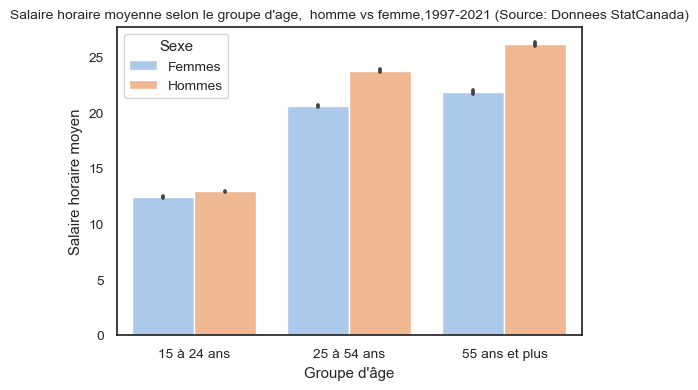

In [205]:
#filtre_sexe=salaire_employe_CNP['Sexe'].isin(['Femmes','Hommes'])
#filtre_groupe_age=salaire_employe_CNP!="Groupe d'âge"
sns.barplot(data=salaire_employe_CNP, 
             x="Groupe d'âge", 
             y='Salaire horaire moyen',
             hue='Sexe')
plt.title(label="Salaire horaire moyenne selon le groupe d'age,  homme vs femme,1997-2021 (Source: Donnees StatCanada)",
          fontdict={'fontsize':10}, loc='center')
plt.show()

In [214]:
moyensf=pd.Series(salaire_employe_CNP[(salaire_employe_CNP['Sexe']=='Femmes') & (salaire_employe_CNP['Groupe d\'âge']=="55 ans et plus")]['Salaire horaire moyen'].mean()).sort_values(ascending=True)
moyensh=pd.Series(salaire_employe_CNP[(salaire_employe_CNP['Sexe']=='Hommes')& (salaire_employe_CNP['Groupe d\'âge']=="55 ans et plus")]['Salaire horaire moyen'].mean()).sort_values(ascending=True)

print("Moyen du salaire horaire femmes, 55 ans et plus:", moyensf)
print("Moyen du salaire horaire hommes, 55 ans et plus:", moyensh)
print("L'écart rémunération:",moyensh-moyensf)


Moyen du salaire horaire femmes, 55 ans et plus: 0    21.818626
dtype: float64
Moyen du salaire horaire hommes, 55 ans et plus: 0    26.15305
dtype: float64
L'écart rémunération: 0    4.334423
dtype: float64


<ul>
Le salaire horaire moyenne des femmes est inférieur à celui des hommes, peu importe le groupe d'age.

On observe l'écart le plus important entre les sexes dans les groupes d'âge de 25 à 54 ans, et de 55 ans et plus, ou le 
salaire horaire moyenne est de plus de 4\$ inférieur à celui des hommes.

</ul>

### Genre de travail

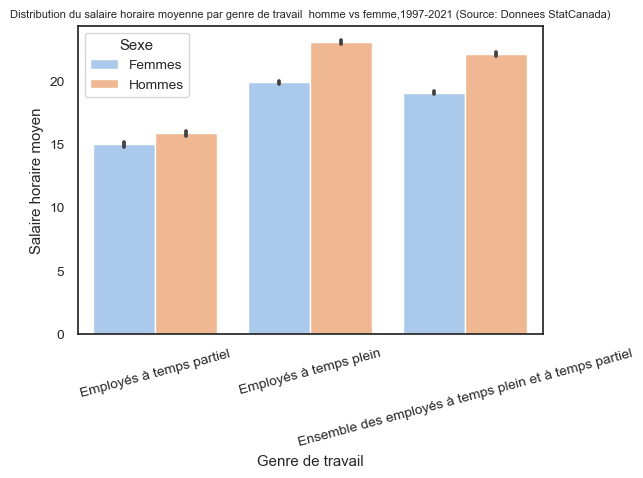

In [207]:
filtre_sexe=salaire_employe_CNP['Sexe'].isin(['Femmes','Hommes'])
sns.barplot(data=salaire_employe_CNP[filtre_sexe], 
             x="Genre de travail", 
             y='Salaire horaire moyen',
             hue='Sexe')
plt.title(label="Salaire horaire moyenne par genre de travail  homme vs femme,2000-2021 (Source: Donnees StatCanada)",
          fontdict={'fontsize':8}, loc='center')
plt.xticks(rotation=15)
plt.show()

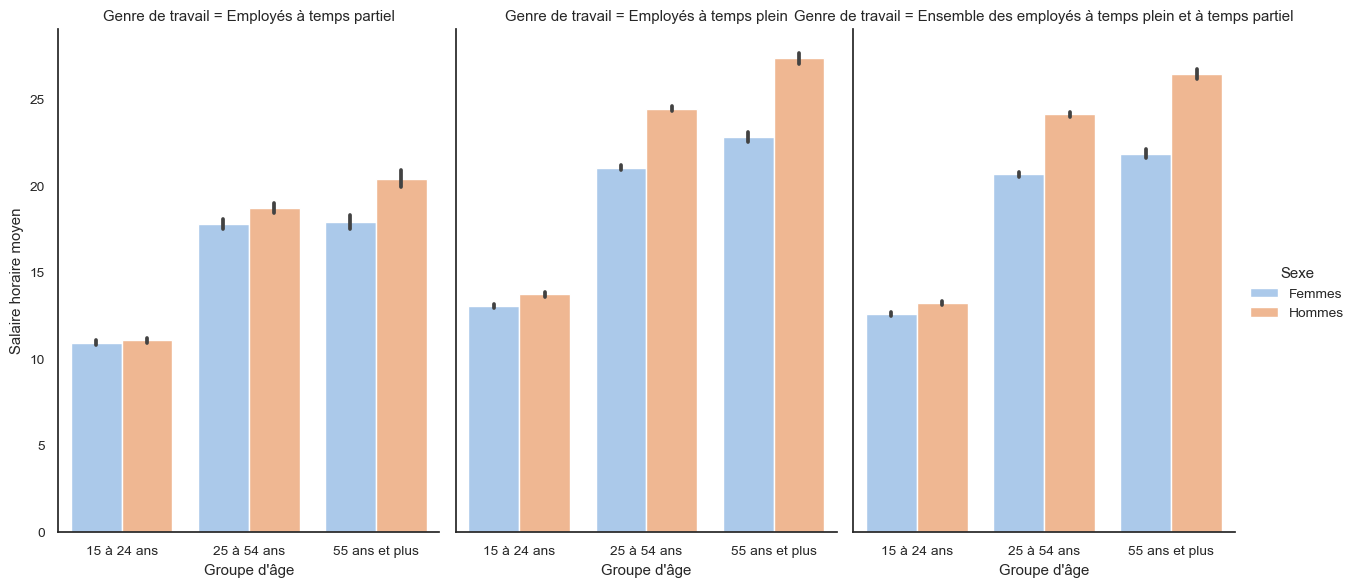

In [206]:
sns.catplot(x="Groupe d'âge", y="Salaire horaire moyen",
                   hue="Sexe", 
                   col="Genre de travail",
                   data=salaire_employe_CNP[filtre_sexe], 
                   kind="bar",
                   height=6, 
                   #alpha=0.15,
                   aspect=.7);
#plt.xticks(rotation=25)
plt.show()

On observe l'écart du salaire horaire moyen homme vs. femme augument avec l'âge et le genre de travail.

### Regions 

### Distribution des effectifs par region, region /sexe

In [193]:
salaire_employe_CNP[['Régions','Sexe']].value_counts().sort_index()

Régions                  Sexe  
Alberta                  Femmes    4447
                         Hommes    4447
Colombie-Britannique     Femmes    4890
                         Hommes    4890
Manitoba                 Femmes    4498
                         Hommes    4498
Nouveau-Brunswick        Femmes    3113
                         Hommes    3113
Nouvelle-Écosse          Femmes    3652
                         Hommes    3652
Ontario                  Femmes    7247
                         Hommes    7247
Québec                   Femmes    6068
                         Hommes    6068
Saskatchewan             Femmes    3857
                         Hommes    3857
Terre-Neuve-et-Labrador  Femmes    2362
                         Hommes    2362
Île-du-Prince-Édouard    Femmes    2140
                         Hommes    2140
dtype: int64

<Figure size 800x1200 with 0 Axes>

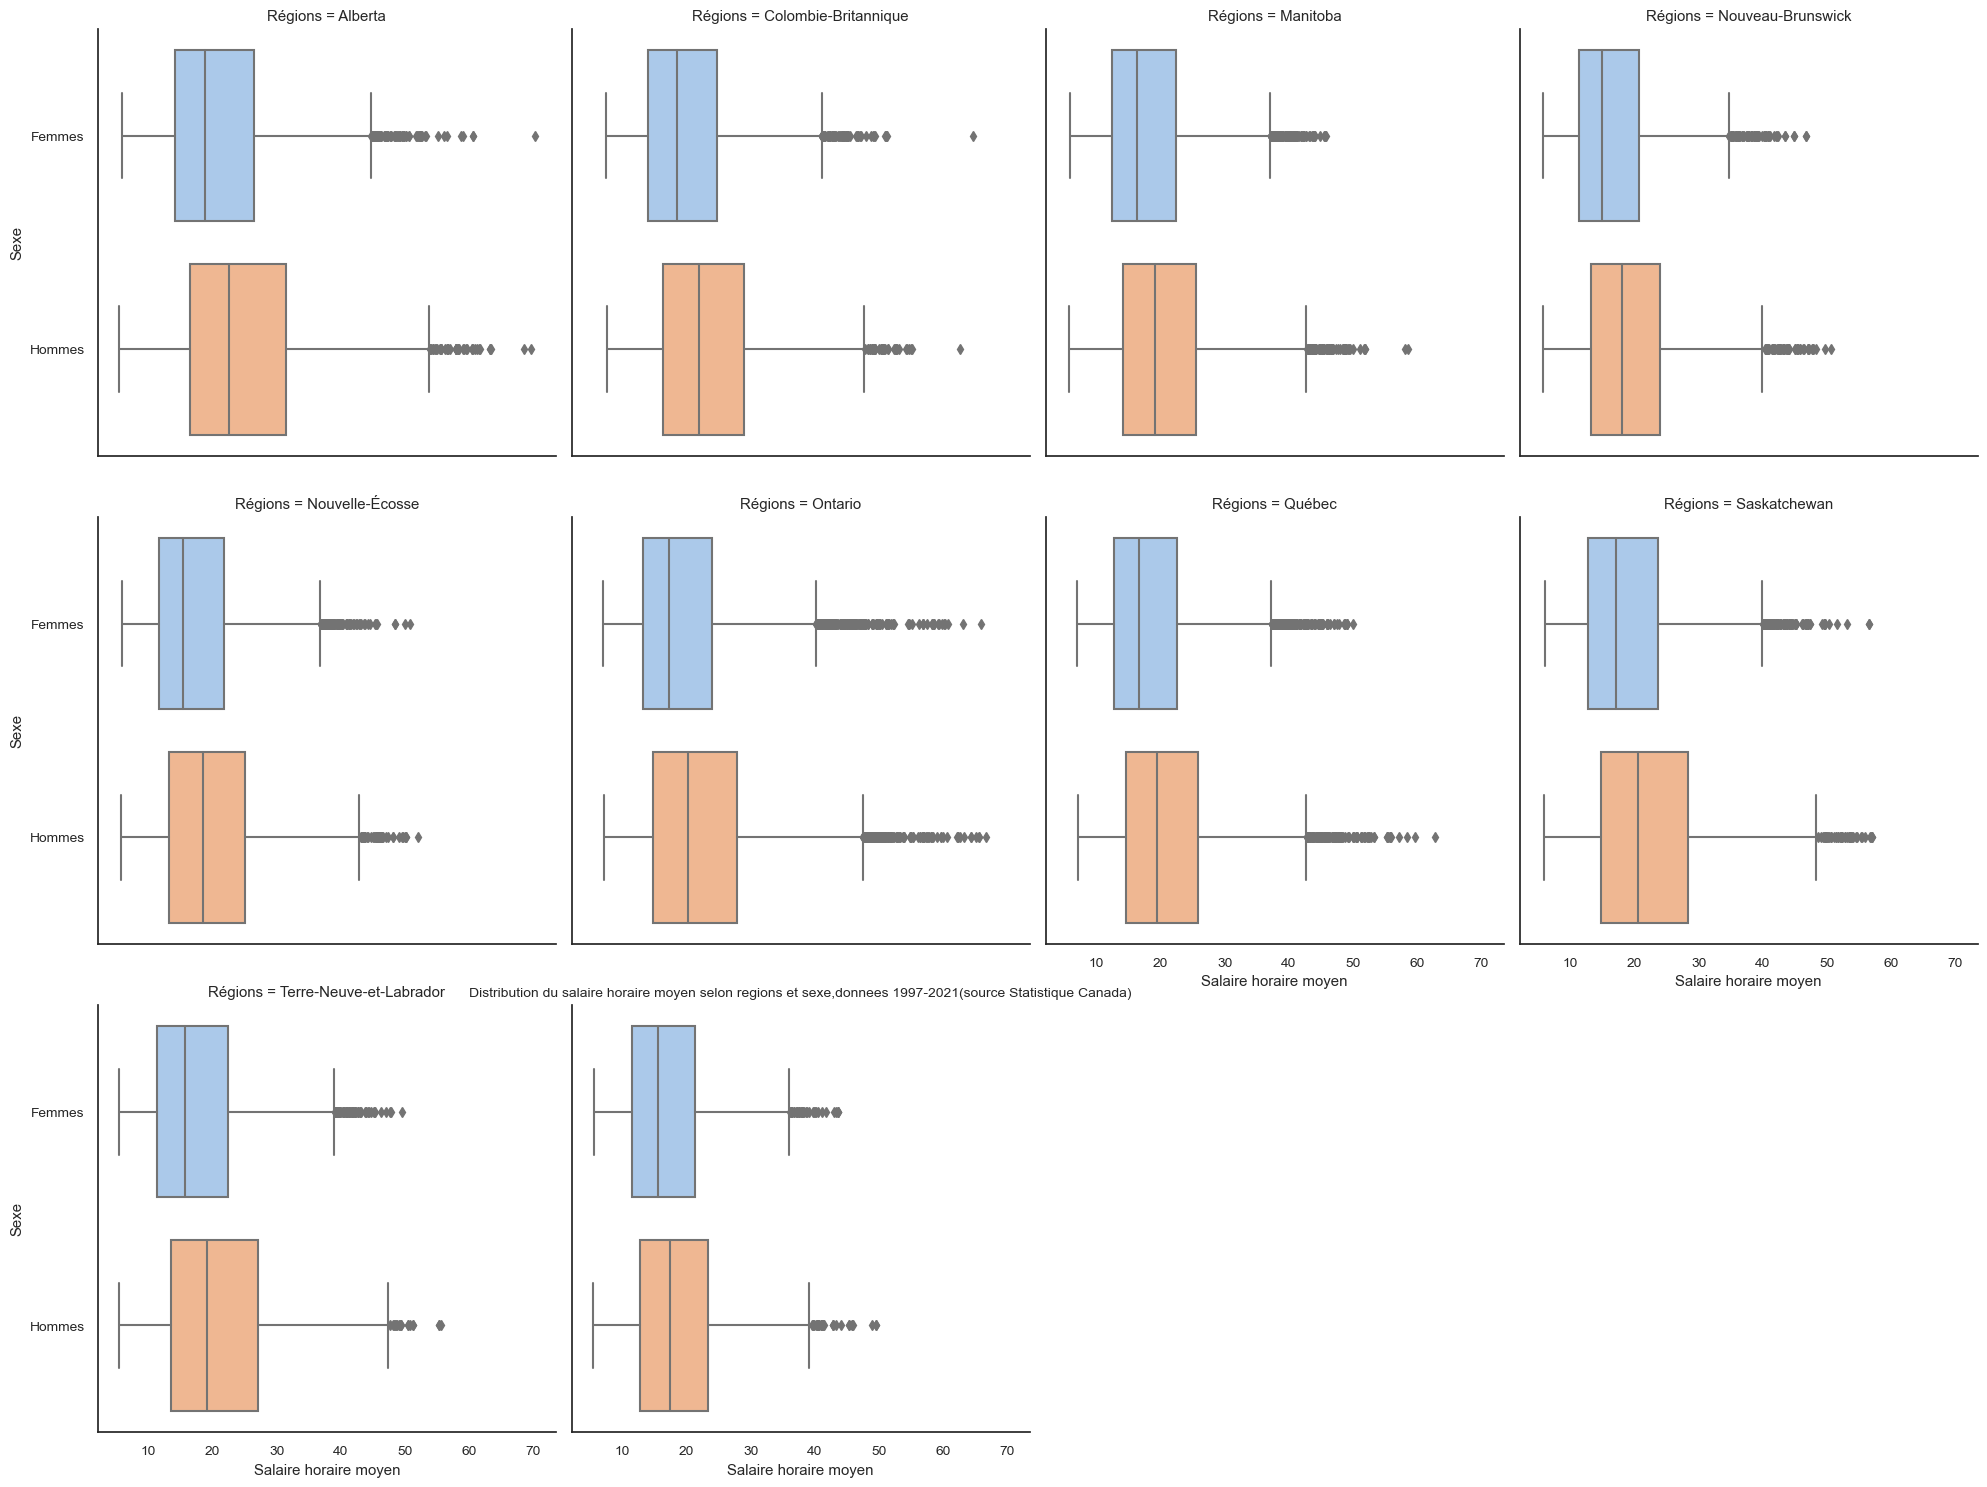

In [194]:
#sal_empl_sexe=salaire_employe_CNP['Sexe'].isin(['Femmes','Hommes'])
filtre_sexe=salaire_employe_CNP['Sexe'].isin(['Femmes','Hommes'])

plt.figure(figsize=(8,12))
sns.catplot(data=salaire_employe_CNP[filtre_sexe],
           col_wrap=4,
            x="Salaire horaire moyen" , 
            y="Sexe", 
            kind="box",
            col="Régions",
            #hue='Sexe',
            #palette="pastel",
           dodge=True)
plt.title(label="Distribution du salaire horaire moyen selon regions et sexe,donnees 1997-2021(source Statistique Canada)",
          fontdict={'fontsize':10}, loc='center')
#plt.xticks(rotation=35)
plt.show()

L'écart salarial entre les femmes et hommes est présent dans toutes les provinces.

### CNP

In [195]:
salaire_employe_CNP[['CNP','Sexe']].value_counts().sort_index()

CNP                                                                                                                           Sexe  
Affaires, finance et administration [1]                                                                                       Femmes    1825
                                                                                                                              Hommes    1825
Arts, culture, sports et loisirs [5]                                                                                          Femmes    1042
                                                                                                                              Hommes    1042
Cadres intermédiaires dans le commerce de détail, de gros et des services à la clientèle [06]                                 Femmes     744
                                                                                                                                        ... 
Superviseurs/supervis

In [221]:
print()
print("Salaire horaire moyen selon CNP, données(2000-2020) source Stat Canada")
effectifs=pd.Series(salaire_employe_CNP['CNP'].value_counts()).sort_values(ascending=True)
moyens=pd.Series(salaire_employe_CNP.groupby('CNP')['Salaire horaire moyen'].mean()).sort_values(ascending=True)
moyensf=pd.Series(salaire_employe_CNP[salaire_employe_CNP['Sexe']=='Femmes'].groupby('CNP')['Salaire horaire moyen'].mean()).sort_values(ascending=True)
moyensh=pd.Series(salaire_employe_CNP[salaire_employe_CNP['Sexe']=='Hommes'].groupby('CNP')['Salaire horaire moyen'].mean()).sort_values(ascending=True)
moyens=pd.Series(salaire_employe_CNP.groupby('CNP')['Salaire horaire moyen'].mean()).sort_values(ascending=True)
frequence=round((effectifs/salaire_employe_CNP.shape[0])*100,2)
sommaire_Ind=pd.concat([effectifs,frequence], axis=1,keys=['Eff.',"Freq"])
sommaire_Ind['EffectCumulle']=sommaire_Ind['Eff.'].cumsum()
sommaire_Ind['FreqCumulle']= sommaire_Ind['Freq'].cumsum()
sommaire_Ind["Salaire horaire moyen"]=moyens
sommaire_Ind["Salaire horaire moyen femmes"]=moyensf
sommaire_Ind["Salaire horaire moyen hommes"]=moyensh
sommaire_Ind["Diff salaire horaire moyenne"]=moyensh-moyensf
sommaire_Ind.loc[sommaire_Ind["Diff salaire horaire moyenne"]<=4.99,"Ind plus grand que 5"]="False"
sommaire_Ind.loc[sommaire_Ind["Diff salaire horaire moyenne"]>=5,"Ind plus grand que 5"]="True"
sommaire_Ind.loc[sommaire_Ind["Diff salaire horaire moyenne"]<=1.99,"Ind plus grand que 2"]="True"
sommaire_Ind.loc[sommaire_Ind["Diff salaire horaire moyenne"]>=2,"Ind plus grand que 2"]="False"
sommaire_Ind.head()


Salaire horaire moyen selon CNP, données(2000-2020) source Stat Canada


,Eff.,Freq,EffectCumulle,FreqCumulle,Salaire horaire moyen,Salaire horaire moyen femmes,Salaire horaire moyen hommes,Diff salaire horaire moyenne,Ind plus grand que 5,Ind plus grand que 2
"Personnel de soutien des métiers, manoeuvres et aides d'entreprise en construction et autre personnel assimilé [76]",80,0.09,80,0.09,21.539750,19.720000,23.359500,3.639500,False,False
"Superviseurs/superviseures et métiers techniques dans les ressources naturelles, l'agriculture et la production connexe [82]",86,0.10,166,0.19,33.120698,30.989535,35.251860,4.262326,False,False
"Manoeuvres à la récolte, en aménagement paysager et en ressources naturelles [86]",254,0.30,420,0.49,15.013150,13.685433,16.340866,2.655433,False,False
Personnel des métiers d'entretien et d'opération d'équipement [73],366,0.43,786,0.92,23.865984,21.254044,26.477923,5.223880,True,False
"Personnel de supervision dans la transformation, la fabrication et les services d'utilité publique et opérateurs/opératrices de poste central de contrôle [92]",394,0.47,1180,1.39,25.541827,22.216650,28.867005,6.650355,True,False


In [218]:
print()
print("L'écart du salaire horaire moyen de plus de 5$")

sommaire_Ind[sommaire_Ind["Ind plus grand que 5"]=="True"]


L'écart du salaire horaire moyen de plus de 5$


,Eff.,Freq,EffectCumulle,FreqCumulle,Salaire horaire moyen,Salaire horaire moyen femmes,Salaire horaire moyen hommes,Diff salaire horaire moyenne,Ind plus grand que 5
Personnel des métiers d'entretien et d'opération d'équipement [73],366,0.43,786,0.92,23.865984,21.254044,26.477923,5.223880,True
"Personnel de supervision dans la transformation, la fabrication et les services d'utilité publique et opérateurs/opératrices de poste central de contrôle [92]",394,0.47,1180,1.39,25.541827,22.216650,28.867005,6.650355,True
Cadres supérieurs/cadres supérieures [00],402,0.48,1582,1.87,39.603831,36.850995,42.356667,5.505672,True
"Personnel des métiers de l'électricité, de la construction et des industries [72]",450,0.53,2448,2.89,23.975356,21.454667,26.496044,5.041378,True
"Cadres intermédiaires des métiers, des transports, de la production et des services d'utilité publique [07-09]",632,0.75,4214,4.98,32.729320,30.185506,35.273133,5.087627,True
"Dispensateurs/dispensatrices de soins et personnel de soutien en enseignement, en droit et en protection publique [44]",914,1.08,9954,11.76,20.056772,16.578753,23.534792,6.956039,True
"Cadres intermédiaires dans le commerce de détail, de gros et des services à la clientèle [06]",1488,1.76,16988,20.08,23.070652,19.821667,26.319637,6.497970,True
Cadres intermédiaires spécialisés/cadres intermédiaires spécialisées [01-05],1678,1.98,23428,27.70,36.539571,33.826544,39.252598,5.426055,True
Fabrication et services d'utilité publique [9],2294,2.71,47076,55.67,16.524464,13.954952,19.093976,5.139024,True


In [222]:
print()
print("L'écart du salaire horaire moyen inférieur à 2$")

sommaire_Ind[sommaire_Ind["Ind plus grand que 2"]=="True"]


L'écart du salaire horaire moyen inférieur à 2$


,Eff.,Freq,EffectCumulle,FreqCumulle,Salaire horaire moyen,Salaire horaire moyen femmes,Salaire horaire moyen hommes,Diff salaire horaire moyenne,Ind plus grand que 5,Ind plus grand que 2
Personnel professionnel en soins infirmiers [30],540,0.64,2988,3.53,32.951944,33.177296,32.726593,-0.450704,False,True
Personnel professionnel des arts et de la culture [51],674,0.80,4888,5.78,25.815668,25.119941,26.511395,1.391454,False,True
Personnel professionnel des soins de santé (sauf soins infirmiers) [31],828,0.98,7288,8.61,32.693140,32.275338,33.110942,0.835604,False,True
Personnel de soutien des services de santé [34],844,1.00,8132,9.61,18.961434,18.539479,19.383389,0.843910,False,True
Personnel technique des soins de santé [32],1110,1.31,12970,15.32,24.188838,23.659207,24.718468,1.059261,False,True
"Personnel professionnel du droit et des services gouvernementaux, sociaux et communautaires [41]",1682,1.99,25110,29.69,30.215030,29.468002,30.962057,1.494055,False,True
"Personnel technique des arts, de la culture, des sports et des loisirs [52]",1730,2.05,28526,33.73,17.934931,17.069896,18.799965,1.730069,False,True
"Personnel de coordination de la distribution, du suivi et des horaires [15]",1804,2.13,30330,35.86,17.526680,17.158581,17.894778,0.736197,False,True
Personnel de soutien de bureau [14],1966,2.33,34248,40.50,17.126745,16.428616,17.824873,1.396256,False,True
Secteur de la santé [3],2056,2.43,38304,45.30,25.276235,24.820953,25.731518,0.910564,False,True


### Analyse de la variable salaire horaire moyenne 

#### Valeurs aberantes 


Les boxplots sont un moyen standard d’afficher la distribution d’une variable en utilisant le premier quartile, la médiane, le troisième quartile et les moustaches.

* La médiane, indiquée par la ligne à l’intérieur de l’encadré.
* La fourchette interquantile (IQR), la boîte elle-même.
* Les quantiles, le 25e (Q1) est l’extrémité inférieure et le 75e (Q3) l’extrémité supérieure de la boîte.
* Les moustaches, qui s’étendent jusqu’à :
* la moustache supérieure : Q3 + 1,5 x IQR
* moustache inférieure : Q1 -1,5 x IQR

Diagramme de probabilite:
https://www.mathworks.com/help/stats/probplot.html

* genere la diagramme de probabilite de donnees d'un echantillon par rapport aux quantils de la loi normale.
* la fonction **probplot** calcule eventuellement une ligne mieux adapte aux donnees

In [15]:
salaire_employe_CNP.columns

Index(['Année', 'Régions', 'CNP', 'Sexe', 'Groupe d'âge',
       'Ratio_salaire_hebdo_moyen', 'Ratio_salaire_hebdo_median',
       'Ratio_salaire_horaire_moyen', 'Ratio_salaire_horaire_median',
       'Salaire hebdomadaire moyen', 'Salaire hebdomadaire médian',
       'Salaire horaire moyen', 'Salaire horaire médian',
       'Total des employés, tous les salaires'],
      dtype='object')

In [223]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(16, 4))

    # histogramme
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('histogramme')

    # Q-Q 
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

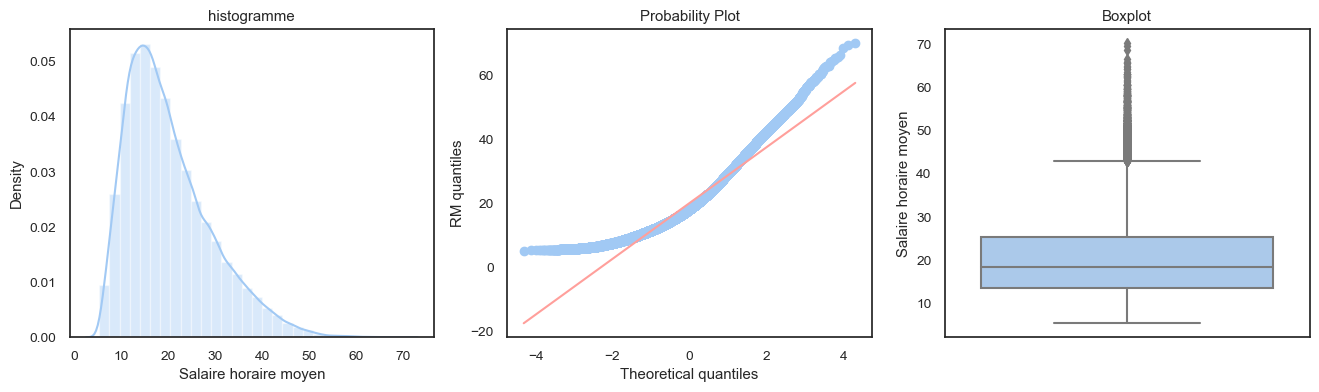

In [224]:
diagnostic_plots(salaire_employe_CNP,"Salaire horaire moyen")

In [225]:
salaire_employe_CNP["Salaire horaire moyen"].describe()

count    84548.000000
mean        20.233576
std          9.007709
min          5.390000
25%         13.460000
50%         18.340000
75%         25.270000
max         70.210000
Name: Salaire horaire moyen, dtype: float64

La distribution du salaire hebdomadaire moyen est bimodale asymétrique positive. 
Elle est inclinée avec une queue vers la droite. 
Selon le boxplot, il y a quelques valeurs aberrantes à l’extrémité droite de la distribution de la variable.

25% des donnees ont le salaire hebdomadaire moyenne a 0. 

##### Methode boxplot

In [226]:
def find_skewed_boundaries(df, variable, distance):

    # Calculons les limites en dehors desquelles se situent les valeurs aberrantes
    # pour les distributions biaisées

    # la distance passée en argument, nous donne la possibilité de
    # estimer 1,5 fois ou 3 fois le RQI à calculer
    # les limites.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [227]:
upper_boundary, lower_boundary=find_skewed_boundaries(salaire_employe_CNP,'Salaire horaire moyen',1.5)
upper_boundary, lower_boundary

(42.985, -4.2549999999999955)

In [228]:
# examinons le nombre et le pourcentage de valeurs aberrantes
# pour la cote de la dernière course

print('Nombre de individus: {}'.format(len(salaire_employe_CNP)))
print()
print('Individus dont le salaire hebdomadaire moyen avec une valeur > 42.985 : {}'.format(
    len(salaire_employe_CNP[salaire_employe_CNP['Salaire horaire moyen'] > upper_boundary])))
print()
print('% Individus dont le salaire hebdomadaire moyen avec une valeur > 42.985 : {}'.format(
    len(salaire_employe_CNP[salaire_employe_CNP['Salaire horaire moyen'] > upper_boundary])/len(salaire_employe_CNP)*100))

Nombre de individus: 84548

Individus dont le salaire hebdomadaire moyen avec une valeur > 42.985 : 1730

% Individus dont le salaire hebdomadaire moyen avec une valeur > 42.985 : 2.0461749538723564


La limite supérieure indique une valeur de ~42.985\$.
La limite inférieure est négative, mais la variable salaire horaire moyen ne prend pas de valeur négative. 

Pour calculer les valeurs aberrantes du salaire horaire moyen, nous n’utilisons donc que la limite supérieure.
Les valeurs aberrantes se situent uniquement à la queue droite de la distribution de celle-ci.

Nous observons 1730 cas, soit 2.04% de l’ensemble de données, avec des valeurs extrêmement élevées pour le salaire.

In [233]:
84548*0.005

422.74

##### Methode forêt d'isolation

Dans ce qui suit, on va supposer, pour l'exemple, que la base de données contient 0,5% de valeurs aberrantes de toutes sortes. Ce n'est pas exagéré. Cela représente $0,005*84548 \approx 422$ valeurs.

On utilise la méthode de la [forêt d'isolation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html) pour détecter et éliminer un maximum de 0,5% des valeurs possiblement aberrantes. 

In [231]:
from sklearn.ensemble import IsolationForest
# Trouvons les valeurs aberrantes; la variable 'outlier' vaut -1 
# pour les valeurs aberrantes et +1 pour les autres.
i_forest = IsolationForest(contamination= 0.005, random_state=42)
salaire_employe_CNP_=salaire_employe_CNP.copy()
salaire_employe_CNP_['outliers'] = i_forest.fit(np.array(salaire_employe_CNP['Salaire horaire moyen']).reshape(-1, 1)).predict(np.array(salaire_employe_CNP['Salaire horaire moyen']).reshape(-1, 1))

# Affichons les 15 premières données de la base de données
salaire_employe_CNP_[salaire_employe_CNP_['outliers']==-1].head(15)

,Année,Régions,CNP,Sexe,Groupe d'âge,Genre de travail,Ratio_salaire_hebdo_moyen,Ratio_salaire_hebdo_median,Ratio_salaire_horaire_moyen,Ratio_salaire_horaire_median,Salaire hebdomadaire moyen,Salaire hebdomadaire médian,Salaire horaire moyen,Salaire horaire médian,"Total des employés, tous les salaires",outliers
192982,2006,Ontario,Cadres supérieurs/cadres supérieures [00],Hommes,55 ans et plus,Employés à temps plein,0.00,0.00,0.00,0.00,2227.77,2403.75,49.76,51.92,5.8,-1
242551,2009,Alberta,Cadres supérieurs/cadres supérieures [00],Hommes,25 à 54 ans,Employés à temps plein,0.00,0.00,0.00,0.00,2575.31,2673.00,60.49,57.69,3.6,-1
242552,2009,Alberta,Cadres supérieurs/cadres supérieures [00],Hommes,25 à 54 ans,Ensemble des employés à temps plein et à temps...,0.00,0.00,0.00,0.00,2575.31,2673.00,60.49,57.69,3.6,-1
243670,2009,Alberta,Personnel professionnel du droit et des servic...,Hommes,55 ans et plus,Employés à temps plein,0.00,0.00,0.00,0.00,2350.81,1923.00,55.56,51.28,1.9,-1
243671,2009,Alberta,Personnel professionnel du droit et des servic...,Hommes,55 ans et plus,Ensemble des employés à temps plein et à temps...,0.00,0.00,0.00,0.00,2113.98,1846.13,52.39,49.23,2.2,-1
253570,2009,Ontario,Cadres supérieurs/cadres supérieures [00],Hommes,55 ans et plus,Employés à temps plein,0.00,0.00,0.00,0.00,2538.62,2404.00,54.88,54.09,5.8,-1
253571,2009,Ontario,Cadres supérieurs/cadres supérieures [00],Hommes,55 ans et plus,Ensemble des employés à temps plein et à temps...,0.00,0.00,0.00,0.00,2277.61,2163.60,50.94,52.52,6.6,-1
262714,2010,Alberta,Cadres intermédiaires spécialisés/cadres inter...,Hommes,55 ans et plus,Employés à temps plein,0.00,0.00,0.00,0.00,2009.31,1923.00,49.97,50.00,3.2,-1
262715,2010,Alberta,Cadres intermédiaires spécialisés/cadres inter...,Hommes,55 ans et plus,Ensemble des employés à temps plein et à temps...,0.00,0.00,0.00,0.00,1969.77,1923.00,49.74,49.45,3.3,-1
263795,2010,Alberta,Personnel professionnel des sciences naturelle...,Hommes,55 ans et plus,Ensemble des employés à temps plein et à temps...,0.00,0.00,0.00,0.00,2110.72,1961.65,53.90,52.88,6.5,-1


In [232]:
salaire_employe_CNP_[salaire_employe_CNP_['outliers']==-1].shape

(413, 16)

#### Élimination des valeurs aberrantes.

Il faut éliminer toutes les lignes contenant des valeurs aberrantes. 

In [243]:
salaire_employe_CNP_ = salaire_employe_CNP_[salaire_employe_CNP_.outliers > 0]
salaire_employe_CNP_ = salaire_employe_CNP_.drop(['outliers'], axis=1)

In [245]:
salaire_employe_CNP_.shape

(84135, 15)

In [247]:
salaire_employe_CNP_.to_csv("salaire_employe_CNP", index = False)

### Salaire horaire moyen

#### Est-ce que le salaire horaire moyen des femmes est significativement différents de celui de hommes?

In [236]:
dff = salaire_employe_CNP.loc[salaire_employe_CNP['Sexe']=='Femmes']
dff['Salaire horaire moyen'].describe()

count    42274.000000
mean        18.832700
std          8.323587
min          5.410000
25%         12.670000
50%         16.850000
75%         23.327500
max         70.210000
Name: Salaire horaire moyen, dtype: float64

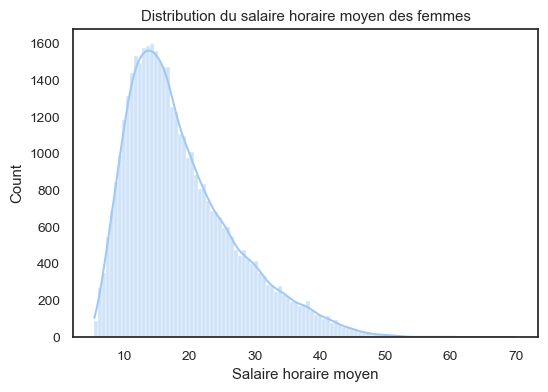

In [237]:
plt.figure(figsize=(6,4))
sns.histplot(data=dff, x='Salaire horaire moyen', kde=True)
plt.title("Distribution du salaire horaire moyen des femmes")
plt.show()

In [238]:
dfm = salaire_employe_CNP.loc[salaire_employe_CNP['Sexe']=='Hommes']
dfm['Salaire horaire moyen'].describe()

count    42274.000000
mean        21.634452
std          9.437821
min          5.390000
25%         14.550000
50%         19.860000
75%         27.157500
max         69.580000
Name: Salaire horaire moyen, dtype: float64

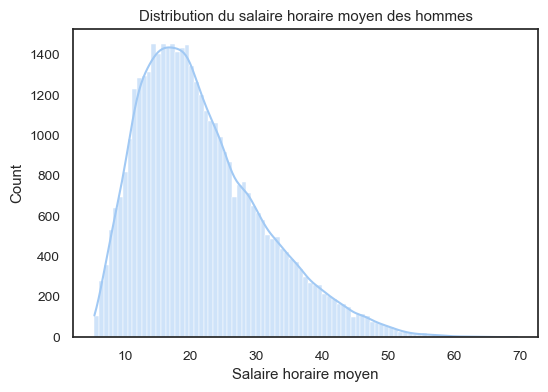

In [246]:
plt.figure(figsize=(6,4))
sns.histplot(data=dfm, x='Salaire horaire moyen', kde=True)
plt.title("Distribution du salaire horaire moyen des hommes")
plt.show()

Les distributions des salaires hebdommadaires moyens sont asymétrique a droite.
On peut formellement tester la normalité de ces distributions avec un test de [Jarque-Bera](https://en.wikipedia.org/wiki/Jarque%E2%80%93Bera_test) à l'aide de la commande `scipy.stats.jarque_bera` ([documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.jarque_bera.html)).

In [239]:
from scipy.stats import jarque_bera

print("Pour les femmes : ", jarque_bera(dff['Salaire horaire moyen']))
print("Pour les hommes : ", jarque_bera(dfm['Salaire horaire moyen']))

Pour les femmes :  Jarque_beraResult(statistic=9397.674741775189, pvalue=0.0)
Pour les hommes :  Jarque_beraResult(statistic=5862.137633933094, pvalue=0.0)


Ainsi, on rejet les hypothèses comme quoi les *salaires horaire moyens* des femmes et des hommes sont distribués selon des lois normales.

Toutefois, les deux distributions ne semblent pas avoir des variances égales : 
* histogramme des femmes un peu plus plat, 
* écart-type des hommes supérieur de 9.17.

On utilise donc le test de Kruskal-Wallis H Test,pour teste si les distributions de deux échantillons sont égales ou non.

<AxesSubplot:xlabel='Salaire horaire moyen', ylabel='Sexe'>

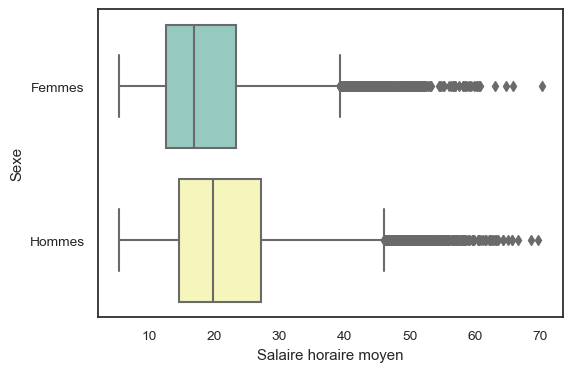

In [240]:
sns.boxplot(x="Salaire horaire moyen", y=salaire_employe_CNP["Sexe"],
                   data=salaire_employe_CNP[filtre_0], palette="Set3")

In [241]:
from scipy.stats import kruskal

stat, p = kruskal(dff['Salaire horaire moyen'], dfm['Salaire horaire moyen'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print("Probablement la même distribution")
else:
    print('Distributions probablement différentes')


stat=2098.057, p=0.000
Distributions probablement différentes


Ainsi, on rejette l'hypothèse que les hommes et les femmes ont le même salaire horaire moyen.

### salaires hebdomandaire moyenne a 0

In [42]:
filtre_salaire0=salaire_employe_CNP["Salaire hebdomadaire moyen"]==0

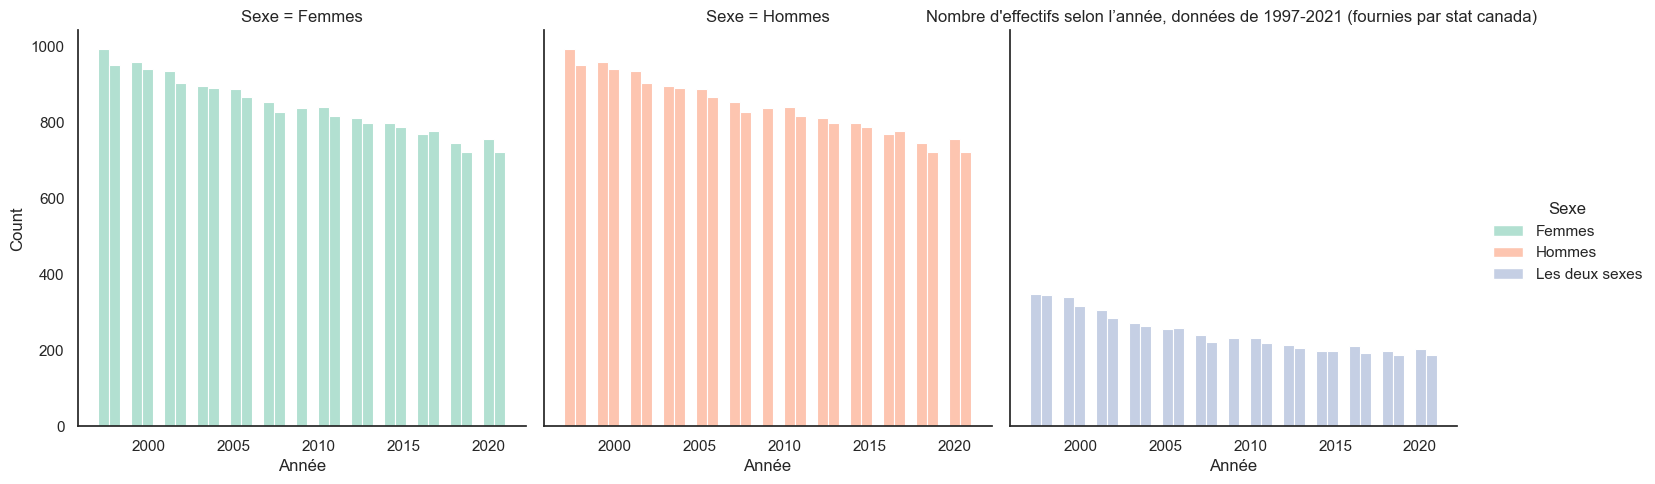

In [81]:
sns.displot(salaire_employe_CNP[filtre_salaire0] ,x="Année",hue='Sexe',col="Sexe")
plt.ylabel("Nbr effectifs")
plt.title("Nombre d'effectifs selon l’année, données de 1997-2021 (fournies par stat canada) ")
plt.show()
plt.show()

In [63]:
y=salaire_employe_CNP['Salaire hebdomadaire moyen'][filtre_salaire0].value_counts()
y

0.0    48277
Name: Salaire hebdomadaire moyen, dtype: int64

In [69]:
salaire_employe_CNP[['Salaire hebdomadaire moyen','Sexe']][filtre_salaire0].groupby('Sexe').value_counts()

Sexe            Salaire hebdomadaire moyen
Femmes          0.0                           21072
Hommes          0.0                           21072
Les deux sexes  0.0                            6133
dtype: int64

In [238]:
effectifs=pd.Series(salaire_employe_CNP[filtre_salaire0]['CNP'].value_counts()).sort_values(ascending=True)
frequence=round((effectifs/salaire_employe_CNP.shape[0])*100,2)
sommaire_Ind=pd.concat([effectifs,frequence], axis=1,keys=['Eff.',"Freq"])
sommaire_Ind['EffectCumulle']=sommaire_Ind['Eff.'].cumsum()
sommaire_Ind['FreqCumulle']= sommaire_Ind['Freq'].cumsum()
sommaire_Ind

,Eff.,Freq,EffectCumulle,FreqCumulle
"Personnel de soutien en service et autre personnel de service, n.c.a. [67]",28,0.02,28,0.02
"Affaires, finance et administration [1]",30,0.02,58,0.04
Représentants/représentantes des ventes et vendeurs/vendeuses - commerce de gros et de détail [64],81,0.05,139,0.09
"Enseignement, droit et services sociaux, communautaires et gouvernementaux [4]",104,0.06,243,0.15
Représentants/représentantes de services et autre personnel de services à la clientèle et personnalisés [65],154,0.09,397,0.24
Personnel de supervision en services et personnel de services spécialisés [63],202,0.12,599,0.36
Personnel de soutien des ventes [66],344,0.20,943,0.56
Fabrication et services d'utilité publique [9],374,0.22,1317,0.78
Gestion [0],400,0.24,1717,1.02
Sciences naturelles et appliquées et domaines apparentés [2],467,0.28,2184,1.30


In [239]:
effectifs=pd.Series(salaire_employe_CNP[filtre_salaire0]['Régions'].value_counts()).sort_values(ascending=True)
frequence=round((effectifs/salaire_employe_CNP.shape[0])*100,2)
sommaire_Ind=pd.concat([effectifs,frequence], axis=1,keys=['Eff.',"Freq"])
sommaire_Ind['EffectCumulle']=sommaire_Ind['Eff.'].cumsum()
sommaire_Ind['FreqCumulle']= sommaire_Ind['Freq'].cumsum()
sommaire_Ind

,Eff.,Freq,EffectCumulle,FreqCumulle
Canada,623,0.37,623,0.37
Ontario,1703,1.01,2326,1.38
Québec,2628,1.56,4954,2.94
Colombie-Britannique,3686,2.19,8640,5.13
Alberta,4081,2.42,12721,7.55
Manitoba,4140,2.46,16861,10.01
Saskatchewan,4965,2.95,21826,12.96
Nouvelle-Écosse,5280,3.14,27106,16.10
Nouveau-Brunswick,5986,3.56,33092,19.66
Terre-Neuve-et-Labrador,7442,4.42,40534,24.08


Il y a 48277(25%) des enregsitrements dont la valeur du salaire hebdomadaire moyen est egal a 0.

Repartition: 

CNP: 
* 2049 (1.37%), Superviseurs/superviseures et métiers techniques dans les ressources naturelles, l'agriculture et la production connexe, 
* 2106 (1.25%), Personnel des services de protection public de première ligne
* 2049	(1.22%) Cadres supérieurs/cadres supérieures [00]		

Regions:

* 4.60% (7743) dans Île-du-Prince-Édouard et Terre-Neuve-et-Labrador	
* 4.42% (5986)	Nouveau-Brunswick et Nouvelle-Écosse
* 1.56% (2628) Québec	
 

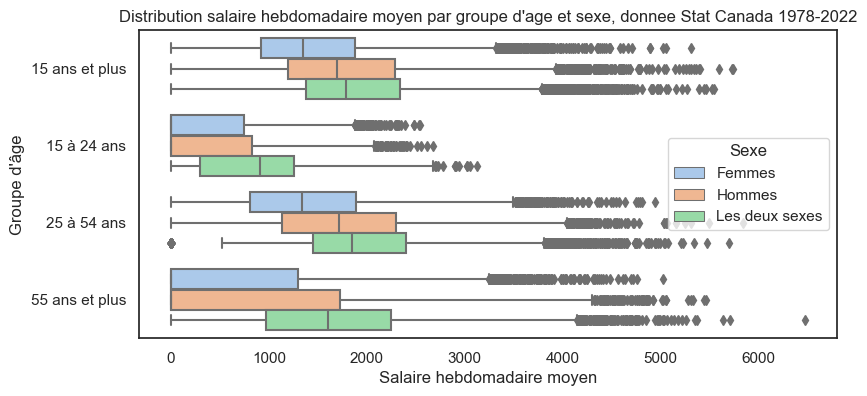

In [24]:
sns.boxplot(x=salaire_employe_CNP["Salaire hebdomadaire moyen"],
            y=salaire_employe_CNP["Groupe d\'âge"],
            hue=salaire_employe_CNP.Sexe,
           palette='pastel')
plt.title("Distribution salaire hebdomadaire moyen par groupe d'age et sexe, donnee Stat Canada 1997-2021")
plt.show()

In [20]:
# Exclure la modalite "Les deux sexes"
filtre_sexe=salaire_employe_CNP['Sexe']!="Les deux sexes"
#salaire_employe_CNP.loc[filtre_sexe]

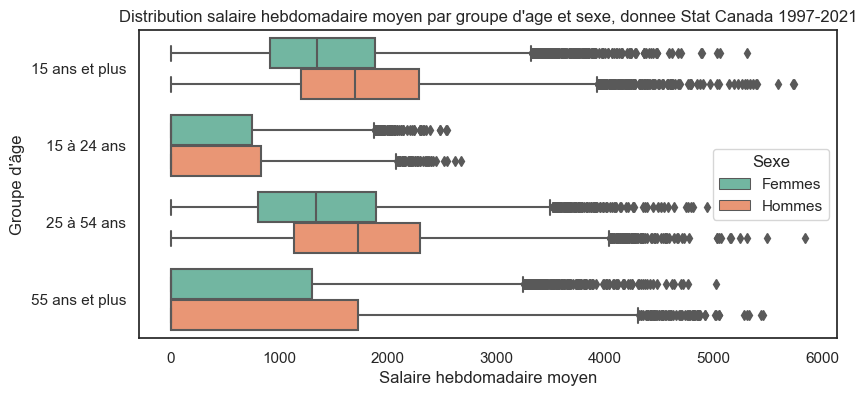

In [32]:
sns.boxplot(x=salaire_employe_CNP["Salaire hebdomadaire moyen"][filtre_sexe],
            y=salaire_employe_CNP["Groupe d\'âge"],
            hue=pd.Series(salaire_employe_CNP.Sexe[filtre_sexe]),
            saturation=0.75,
            #dodge=False,
        
           )
plt.title("Distribution salaire hebdomadaire moyen par groupe d'age et sexe, donnee Stat Canada 1997-2021")
plt.show()

# Annexe 

In [221]:
# Quartille 
Q1=salaire_employe_CNP['Salaire horaire moyen'].quantile(q=0.25)
Q3=salaire_employe_CNP["Salaire horaire moyen"].quantile(q=0.75)
IQR=Q3-Q1
print("1er quantile Q1:",Q1)
print("3em quantile Q3:",Q3)
print("IQR:",IQR)

#Detecter les valeurs extremes(outlier)
l_outlier=Q1-1.5*IQR
r_outlier=Q3+1.5*IQR
print("Limite inferieure:",l_outlier)
print("Limite superieure",r_outlier)

#Afficher le pourcentage des valeurs extremes

print("Le nombre des individus dont le salaire moyenne est superieur a :",r_outlier,"est:",
      salaire_employe_CNP[salaire_employe_CNP['Salaire hebdomadaire moyen']>r_outlier]['Salaire hebdomadaire moyen'].count())

print("%Pourcentage valeurs extremes: ", 
      salaire_employe_CNP[salaire_employe_CNP['Salaire hebdomadaire moyen']>r_outlier]['Salaire hebdomadaire moyen'].count()*100/len(salaire_employe_CNP))

1er quantile Q1: 0.0
3em quantile Q3: 53.46
IQR: 53.46
Limite inferieure: -80.19
Limite superieure 133.65
Le nombre des individus dont le salaire moyenne est superieur a : 133.65 est: 120016
%Pourcentage valeurs extremes:  71.31075460487226


In [ ]:
for feature in salaire_employe_CNP[[
                     #'Ratio_salaire_hebdo_moyen', 'Ratio_salaire_hebdo_median',
                     #'Ratio_salaire_horaire_moyen', 'Ratio_salaire_horaire_median',
                    # 'Salaire hebdomadaire moyen', 'Salaire hebdomadaire médian',
                     'Salaire horaire moyen', 'Salaire horaire médian'#,'Total des employés, tous les salaires'
]]:
    sns.displot(salaire_employe_CNP,
                x=feature,
                col="Sexe",
                row="Groupe d'âge",
                color=COLOR1
               )
    plt.xlabel(feature)
    plt.ylabel("")
    #plt.title("Representation de la densite des "+feature+", données de 1997-2021 fournies par Stat Canada ")
    plt.show()
    #plt.savefig("mygraph.png")

In [ ]:
# Import data

print("Reading in data...")

tr_filepath = "./train_users_2.csv"

df_train = pd.read_csv(tr_filepath, header=0, index_col=None)

te_filepath = "./test_users.csv"

df_test = pd.read_csv(te_filepath, header=0, index_col=None)

 

# Combine into one dataset

df_all = pd.concat((df_train, df_test), axis=0, ignore_index=True)

 

Tests statistiques

https://www.datanovia.com/en/fr/lessons/types-de-test-t/test-t-non-apparie/test-t-de-welch/